<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
rain_data211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172151.csv',encoding='cp949')
rain_data101 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172202.csv',encoding='cp949')
rain_data100 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172215.csv',encoding='cp949')
rain_data212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172236.csv',encoding='cp949')
rain_data90 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172245.csv',encoding='cp949')

In [6]:
# rain_data = pd.merge(rain_data211, rain_data101, how='outer')
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data211, rain_data101, rain_data100, rain_data212, rain_data90])

In [7]:
print(rain_data)

              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         NaN         NaN         NaN         NaN        NaN
1     2009-01-02         NaN         NaN         NaN         NaN        NaN
2     2009-01-03         NaN         NaN         NaN         NaN        NaN
3     2009-01-04         NaN         NaN         NaN         NaN        NaN
4     2009-01-05         NaN         NaN         NaN         NaN        NaN
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         NaN         NaN         NaN         NaN        NaN
5474  2023-12-28         NaN         NaN         NaN         NaN        NaN
5475  2023-12-29         NaN         NaN         NaN         NaN        NaN
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [8]:
rain_col = [i for i in rain_data.columns if '강수' in i]
rain_data[rain_col] = rain_data[rain_col].fillna(0)

In [9]:
print(rain_data.isna().sum().sum())
print(rain_data)

0
              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         0.0         0.0         0.0         0.0        0.0
1     2009-01-02         0.0         0.0         0.0         0.0        0.0
2     2009-01-03         0.0         0.0         0.0         0.0        0.0
3     2009-01-04         0.0         0.0         0.0         0.0        0.0
4     2009-01-05         0.0         0.0         0.0         0.0        0.0
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         0.0         0.0         0.0         0.0        0.0
5474  2023-12-28         0.0         0.0         0.0         0.0        0.0
5475  2023-12-29         0.0         0.0         0.0         0.0        0.0
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [10]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/only_dam_flow.csv',encoding='utf-8')

print(dam_flow)

              날짜  유입량(㎥/s)
0     2009-01-01     0.000
1     2009-01-02     0.825
2     2009-01-03     3.904
3     2009-01-04     0.000
4     2009-01-05     0.000
...          ...       ...
5473  2023-12-27    25.873
5474  2023-12-28    21.186
5475  2023-12-29    20.887
5476  2023-12-30    29.183
5477  2023-12-31    25.803

[5478 rows x 2 columns]


In [11]:
data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data, dam_flow])

In [12]:
print(max(data['유입량(㎥/s)']))

3918.5


<Axes: xlabel='날짜'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


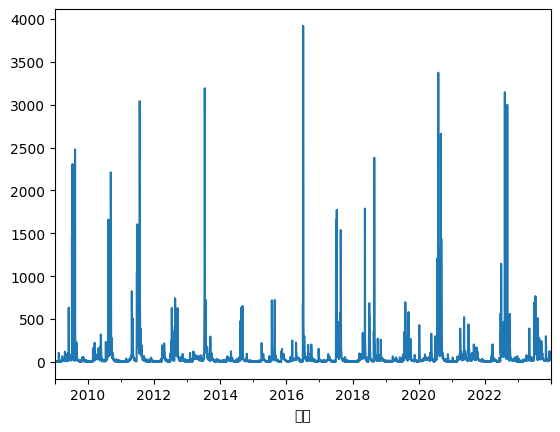

In [13]:
data.index = pd.to_datetime(data['날짜'])

dam_flow = data['유입량(㎥/s)']
dam_flow.plot()

In [26]:
data['Y'] = data['유입량(㎥/s)']
data = data.dropna()

train = data[data['날짜']<'2018-01-01']
valid = data[data['날짜']>='2018-01-01']
valid = valid[valid['날짜']<'2023-01-01']
test = data[data['날짜']>='2023-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['날짜', 'Y'], axis = 1), train['Y']
trainX = trainX.to_numpy()
trainY = trainY.to_numpy()
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1],1)

validX, validY = valid.drop(['날짜', 'Y'], axis = 1), valid['Y']
validX = validX.to_numpy()
validY = validY.to_numpy()
validX = validX.reshape(validX.shape[0], validX.shape[1],1)

testX, testY = test.drop(['날짜', 'Y'], axis = 1), test['Y']
testX = testX.to_numpy()
testY = testY.to_numpy()
testX = testX.reshape(testX.shape[0], testX.shape[1],1)

train set :  3287 
 valid set :  1826 
 test set :  361 



In [15]:
print(trainX)
len(trainX.columns)

            211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)  \
날짜                                                                      
2009-01-01         0.0         0.0         0.0         0.0        0.0   
2009-01-02         0.0         0.0         0.0         0.0        0.0   
2009-01-03         0.0         0.0         0.0         0.0        0.0   
2009-01-04         0.0         0.0         0.0         0.0        0.0   
2009-01-05         0.0         0.0         0.0         0.0        0.0   
...                ...         ...         ...         ...        ...   
2017-12-27         0.0         0.0         0.0         0.0        0.0   
2017-12-28         0.0         0.0         0.0         0.0        0.0   
2017-12-29         0.0         0.0         0.0         0.0        0.0   
2017-12-30         0.4         1.0         0.3         0.6        0.0   
2017-12-31         1.0         1.1         0.0         2.0        0.0   

            유입량(㎥/s)  
날짜                    
2009

6

In [28]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(LSTM(64, input_shape=(6,1)))
model1.add(Dense(40, 'relu'))
model1.add(Dense(40, 'relu'))
model1.add(Dense(8, 'relu'))
model1.add(Dense(8))
model1.add(Dense(1))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_12 (Dense)            (None, 40)                2600      
                                                                 
 dense_13 (Dense)            (None, 40)                1640      
                                                                 
 dense_14 (Dense)            (None, 8)                 328       
                                                                 
 dense_15 (Dense)            (None, 8)                 72        
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 21545 (84.16 KB)
Trainable params: 21545

In [29]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model1.fit(trainX, trainY, validation_data = (validX, validY), batch_size=10, epochs=50, callbacks=[cp1])

Epoch 1/50
329/329 [==============================] - 6s 12ms/step - loss: 44855.5898 - root_mean_squared_error: 211.7914 - val_loss: 48319.2812 - val_root_mean_squared_error: 219.8165
Epoch 2/50
329/329 [==============================] - 4s 13ms/step - loss: 42912.6406 - root_mean_squared_error: 207.1537 - val_loss: 44430.2383 - val_root_mean_squared_error: 210.7848
Epoch 3/50
329/329 [==============================] - 4s 13ms/step - loss: 39866.3711 - root_mean_squared_error: 199.6656 - val_loss: 41702.9258 - val_root_mean_squared_error: 204.2129
Epoch 4/50
329/329 [==============================] - 4s 11ms/step - loss: 37603.6172 - root_mean_squared_error: 193.9165 - val_loss: 39509.6719 - val_root_mean_squared_error: 198.7704
Epoch 5/50
329/329 [==============================] - 5s 14ms/step - loss: 35404.3984 - root_mean_squared_error: 188.1606 - val_loss: 37562.9922 - val_root_mean_squared_error: 193.8117
Epoch 6/50
329/329 [==============================] - 4s 12ms/step - loss: 

In [40]:
train_score = model1.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

12/12 [==============================] - 0s 2ms/step - loss: 10773.7900 - root_mean_squared_error: 103.7969
Train Score: 10773.79 MSE (103.80 RMSE)


In [41]:
train_predictions = model1.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

103/103 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,6.001138,3.904
1,6.569427,0.000
2,9.662770,0.000
3,6.001138,0.312
4,6.001138,0.391
...,...,...
3282,6.016150,5.957
3283,6.066121,6.000
3284,11.945024,0.285
3285,21.926346,2.703


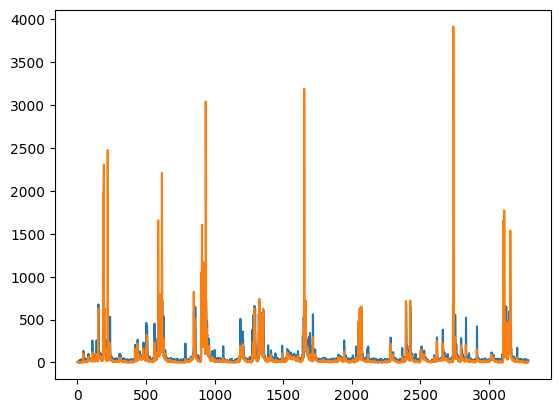

In [42]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:])
plt.plot(train_results['Actuals'][:])

In [43]:
val_predictions = model1.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

58/58 [==============================] - 0s 1ms/step


,Val Predictions,Actuals
0,8.467410,2.894
1,8.558603,0.000
2,8.660082,0.000
3,6.001138,8.841
4,6.001138,3.292
...,...,...
1821,11.524605,9.218
1822,18.458418,4.597
1823,15.679082,7.110
1824,10.371359,7.252


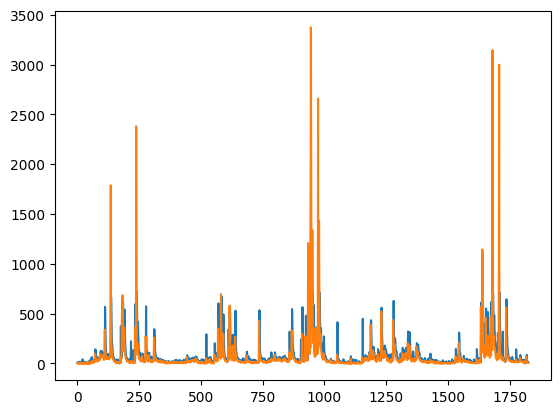

In [44]:
plt.plot(val_results['Val Predictions'][:])
plt.plot(val_results['Actuals'][:])


In [45]:
test_predictions = model1.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

12/12 [==============================] - 0s 1ms/step


,Test Predictions,Actuals
0,13.459958,3.597
1,11.385071,4.283
2,9.349380,1.909
3,10.036169,7.096
4,7.633226,3.040
...,...,...
356,31.937836,25.785
357,32.655369,30.518
358,37.960007,25.873
359,39.357487,21.186


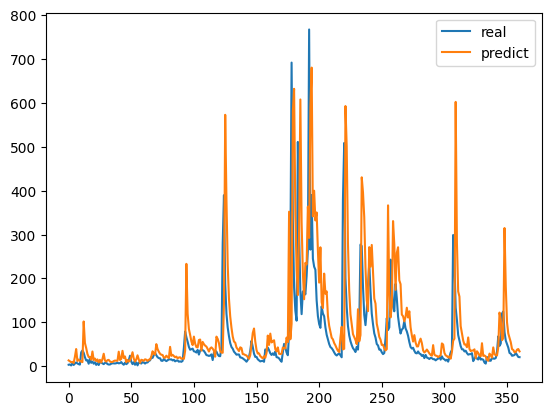

In [46]:
plt.plot(test_results['Actuals'][:])
plt.plot(test_results['Test Predictions'][:])
plt.legend(['real', 'predict'])

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(testY, test_predictions))
rsquared_score = r2_score(testY, test_predictions)
print('R^2 Score : %f' %(rsquared_score))
print('RMSE : %.2f' %(rmse))

R^2 Score : -0.301307
RMSE : 103.80
